In [1]:
%matplotlib inline

In [2]:
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import psfModels as pM
import fit_psf as fp
import numpy as np

## Utility functions 

In [3]:
def plot_2D_color_psf(array, log_scale=True, plot_title=''):
    
    fig, ax = plt.subplots()
    
    size_arr_arcsec = len(array)*pxscale/2

    if log_scale:
        img = ax.imshow(array, norm=LogNorm(vmin=10**-5, vmax=1), origin='lower',
                    extent=(-size_arr_arcsec, size_arr_arcsec, -size_arr_arcsec, size_arr_arcsec))
    else:
        img = ax.imshow(array, origin='lower',
                    extent=(-size_arr_arcsec, size_arr_arcsec, -size_arr_arcsec, size_arr_arcsec))
    ax.set_title(plot_title)
    fig.colorbar(img)

In [4]:
def plot_2D_color_psf(array, log_scale=True, plot_title=''):
    
    fig, ax = plt.subplots()
    
    size_arr_arcsec = len(array)*pxscale/2

    if log_scale:
        img = ax.imshow(array, norm=LogNorm(vmin=10**-5, vmax=1), origin='lower',
                    extent=(-size_arr_arcsec, size_arr_arcsec, -size_arr_arcsec, size_arr_arcsec), vmin=10**-2)
    else:
        img = ax.imshow(array, origin='lower',
                    extent=(-size_arr_arcsec, size_arr_arcsec, -size_arr_arcsec, size_arr_arcsec), vmin=10**-2)
    ax.set_title(plot_title)
    ax.set_ylim(-5,5)
    ax.set_xlim(-5,5)
    fig.colorbar(img)

In [5]:
def plot_semipsf_diff_expo(function, lbda, pxscale, r0):
    """
    Plot kolmogorov psf for several index. 
    Arguments for function are 'Kolmogorov_FFT_interpolation', 'Kolmogorov_Hankel' or 'Kolmogorov_Hankel_interpolation'.
    """
    
    me_x_axis = np.linspace(0,5)
    index = [4/3, 3/2, 5/3, 11/6]
    
    fig, ax = plt.subplots()
    
    for i in index:
        if function == 'Kolmogorov_FFT_interpolation':
            test_psf = pM.psf_Kolmogorov_FFT_interp(me_x_axis.max()+1, lbda, pxscale, r0=r0, expo=i)(me_x_axis) 
        if function == 'Kolmogorov_Hankel':
            test_psf = pM.psf_Kolmogorov_Hankel(me_x_axis, lbda, r0=r0, expo=i)
        if function == 'Kolmogorov_Hankel_interpolation':
            test_psf = pM.psf_Kolmogorov_Hankel_interp(me_x_axis.max()+1, lbda, r0=r0, npts=50, expo=i)(me_x_axis)
            
        ax.plot(me_x_axis, test_psf, label='n = {:.3f}'.format(i))
        
    ax.set_ylim(10**-4)
    ax.set_xlim(0,5)
    
    ax.set_yscale('log')
    ax.set_ylabel('Normalised flux')
    ax.set_xlabel('r [arcsec]')
    
    ax.set_title(function)    
    ax.legend()

## Make array of r

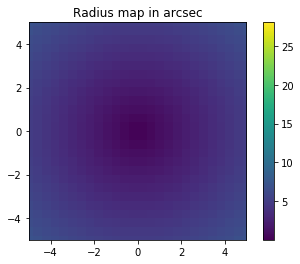

In [6]:
seeing = 1.0                                               # [arcsec]


pxscale = 0.401                                            # [arcsec/pix]       (i.e. résolution)
lbda = 5000e-10                                            # [m]
r0 = 0.10 #0.98 * lbda/seeing * (180/np.pi) * 3600           # [m]

size_array = 100                                            # [pixels]           (i.e. size of map)

shape = (size_array,size_array)                                            # [] size of the grid

x, y = fp.create_coords(shape, starts='auto', steps=pxscale, sparse=True)
radius = np.hypot(x, y)

#size_arr_arcsec = size_array*pxscale/2


plot_2D_color_psf(radius, log_scale=False, plot_title='Radius map in arcsec')

CAREFUL

Table has values in arcsec

Indexes of table or not in arcsec

## Expected FWHM

In [7]:
_ = pM.seeing_fwhm(lbda, r0ref=0.10, lref=5e-7, expo=5/3, verbose=True)

r0=10 cm @5000 Å: seeing=1.01" (FWHM) (expo=1.67)


## FFT no interpolation (non native)

100


/home/novae/rey/anaconda3/lib/python3.7/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


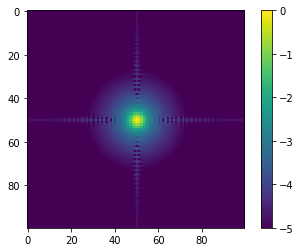

In [8]:
expo = 5/3
rmax = radius.max()
RAD2ARCS = 206264.80624709636         # From radians to arcsecs


# 2D-array construction

imax = 50#int(rmax / pxscale + 1)                   # Image half width [px]
i = np.arange(-imax, imax)                   # px-coordinate (n,) [px]
rpx = np.hypot(*np.meshgrid(i, i, sparse=True))  # Radius 2D-array (n, n) [px]
px2f = RAD2ARCS / pxscale / len(i)               # [1/rad]                     coherent result if do *2 (len(i)=radius)

"""
rpx = radius / pxscale                           # Radius 2D-array (n, n) [px]
px2f = RAD2ARCS / pxscale / len(x)/pxscale               # [1/rad]  #triche
"""

f = rpx * px2f                                   # Spatial freq. 2D-array (n, n) [1/rad]

# FFT-based PSF computation
psf_mefft = pM.psf2D_FFT(pM.otf_Kolmogorov(lbda * f, r0=r0, expo=expo))  # (n, n)

print(psf_mefft.shape[0])

plt.imshow(np.log10(psf_mefft), vmin=-5)
plt.colorbar()

can't test, need to be 2D

## Interpolation FFT

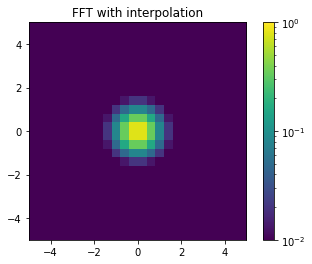

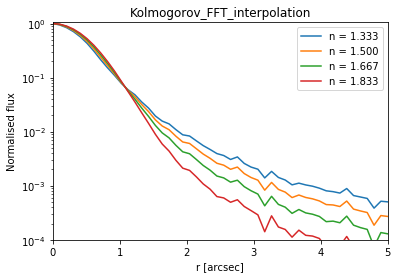

In [9]:
psf_fft_inter = pM.psf_Kolmogorov_FFT_interp(radius.max(), lbda, pxscale, r0=r0, expo=expo)(radius) 

plot_2D_color_psf(psf_fft_inter, plot_title='FFT with interpolation')
plt.savefig('psf_meself_kolmo')
plot_semipsf_diff_expo('Kolmogorov_FFT_interpolation', lbda, pxscale, r0)

## Hankel

/home/novae/rey/Desktop/Stage/kolmogorov/hankelTransform.py:2477: RuntimeWarning: divide by zero encountered in true_divide
  return N.dot(w, g(p/k[..., N.newaxis]).swapaxes(-1, -2)) / k
/home/novae/rey/Desktop/Stage/kolmogorov/hankelTransform.py:2474: RuntimeWarning: invalid value encountered in multiply
  def g(r): return r*f(r)


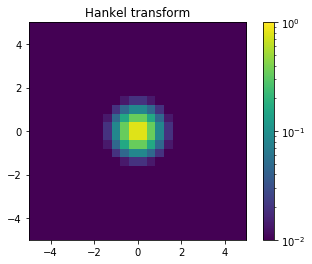

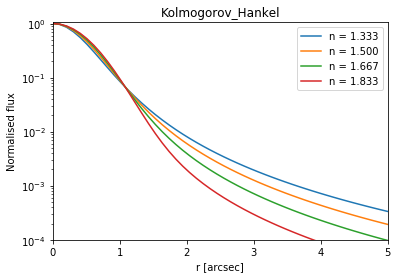

In [10]:
psf_Hank = pM.psf_Kolmogorov_Hankel(radius, lbda, r0=r0)

plot_2D_color_psf(psf_Hank, plot_title='Hankel transform')
plot_semipsf_diff_expo('Kolmogorov_Hankel', lbda, pxscale, r0)

## Interpolation Hankel

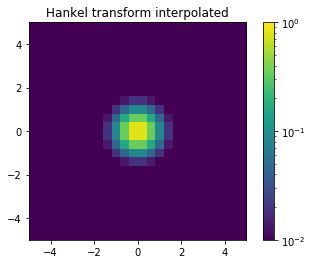

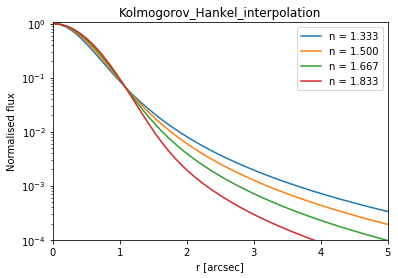

In [11]:
psf_Hank_inter = pM.psf_Kolmogorov_Hankel_interp(radius.max(), lbda, r0=r0, npts=50)(radius)

plot_2D_color_psf(psf_Hank_inter, plot_title='Hankel transform interpolated')
plot_semipsf_diff_expo('Kolmogorov_Hankel_interpolation', lbda, pxscale, r0)

## Middle slice from 2D color PSF

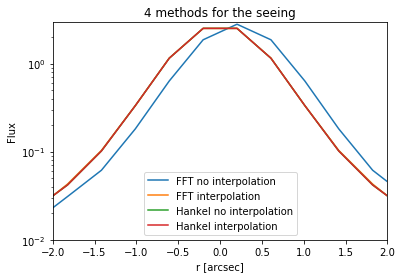

In [24]:
fig, ax_test = plt.subplots()

size_array = psf_mefft.shape[0]

# psf_mefft    psf_fft_inter    psf_Hank    psf_Hank_inter
size_arr_arcsec = len(psf_mefft)*pxscale/2
me_x_axis = np.linspace(-size_arr_arcsec, size_arr_arcsec, size_array)

ax_test.plot(me_x_axis, psf_mefft.sum(0), label='FFT no interpolation')
ax_test.plot(me_x_axis, psf_fft_inter.sum(0), label='FFT interpolation')
ax_test.plot(me_x_axis, psf_Hank.sum(0), label='Hankel no interpolation')
ax_test.plot(me_x_axis, psf_Hank_inter.sum(0), label='Hankel interpolation')

ax_test.set_ylim(10**-2)
ax_test.set_xlim(-2,2)


ax_test.set_yscale('log')
ax_test.set_ylabel('Flux')
ax_test.set_xlabel('r [arcsec]')
ax_test.set_title('4 methods for the seeing')
ax_test.legend()
plt.savefig('comparison_models_kolmo')

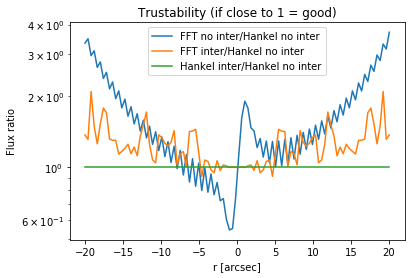

In [13]:
fig, ax_test = plt.subplots()

size_array = psf_mefft.shape[0]

# psf_mefft    psf_fft_inter    psf_Hank    psf_Hank_inter
size_arr_arcsec = len(psf_mefft)*pxscale/2
me_x_axis = np.linspace(-size_arr_arcsec, size_arr_arcsec, size_array)

ax_test.plot(me_x_axis, psf_mefft.sum(0)/psf_Hank_inter.sum(0), label='FFT no inter/Hankel no inter')
ax_test.plot(me_x_axis, psf_fft_inter.sum(0)/psf_Hank_inter.sum(0), label='FFT inter/Hankel no inter')
ax_test.plot(me_x_axis, psf_Hank_inter.sum(0)/psf_Hank_inter.sum(0), label='Hankel inter/Hankel no inter')

#ax_test.set_ylim(10**-2)
#ax_test.set_xlim(0,5)


ax_test.set_yscale('log')
ax_test.set_ylabel('Flux ratio')
ax_test.set_xlabel('r [arcsec]')
ax_test.set_title('Trustability (if close to 1 = good)')
ax_test.legend()